# example - karate club

Number of nodes: 34
Number of edges: 78
Detected 3 communities
Top 5 nodes by betweenness centrality:
Node 0: 0.438
Node 33: 0.304
Node 32: 0.145
Node 2: 0.144
Node 31: 0.138


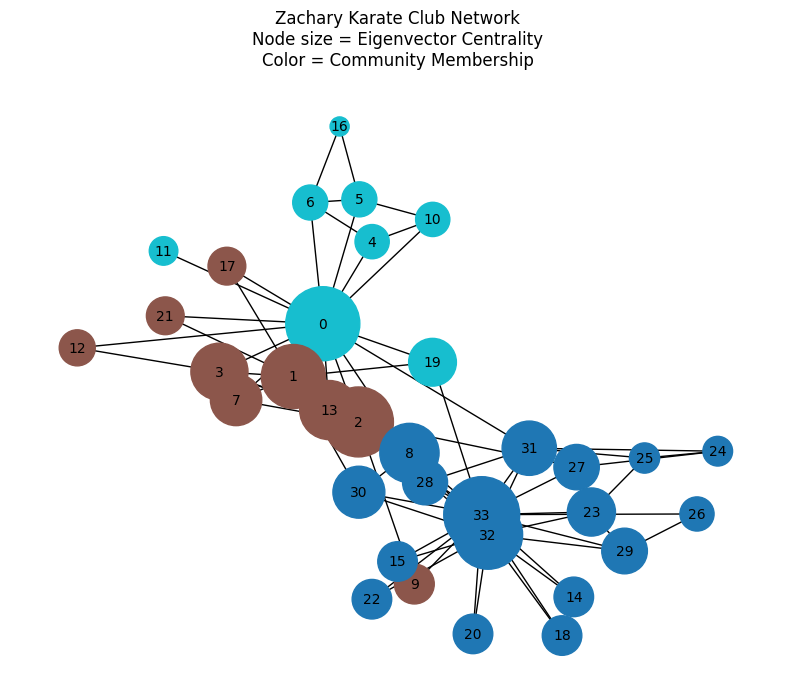

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

# ============================================================
# 1. Load the classic dataset
# ============================================================
G = nx.karate_club_graph()
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


# ============================================================
# 2. Community detection (Greedy Modularity)
# ============================================================
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
print(f"Detected {len(communities)} communities")

# assign each node a community ID for coloring
comm_map = {}
for cid, community in enumerate(communities):
    for node in community:
        comm_map[node] = cid


# ============================================================
# 3. Compute centrality measures
# ============================================================
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)
eig_cent = nx.eigenvector_centrality(G)

print("Top 5 nodes by betweenness centrality:")
for node, score in sorted(bet_cent.items(), key=lambda x: -x[1])[:5]:
    print(f"Node {node}: {score:.3f}")


# ============================================================
# 4. Visualization
# ============================================================
plt.figure(figsize=(10, 8))

pos = nx.spring_layout(G, seed=42)  # reproducible layout

# node colors based on community ID
node_colors = [comm_map[n] for n in G.nodes()]

# node sizes based on eigenvector centrality (scaled)
node_sizes = [8000 * eig_cent[n] for n in G.nodes()]

nx.draw_networkx(
    G,
    pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap="tab10",
    with_labels=True,
    font_size=10,
)

plt.title("Zachary Karate Club Network\nNode size = Eigenvector Centrality\nColor = Community Membership")
plt.axis("off")
plt.show()


**What is the Zachary Karate Club Network?**

In the 1970s, Wayne Zachary studied a karate club at a university.
He mapped who interacted with whom — friendships, training partners, class partners.

Then a conflict arose between:

the *club instructor* (Node 0)

the *club administrator* (Node 33)

The club eventually split into two factions:
one followed the instructor, the other followed the administrator.

Zachary’s network shows all the social connections that existed before the split.

**Network scientists LOVE this dataset because:**

- social dynamics are easy to see

- communities naturally form

- centrality measures reveal leaders and “bridge” individuals

**What the Graph is Actually Showing**

When you run the demo:

- Each circle (node)

    - represents a person in the karate club (34 people total).

- Each line (edge)

    - represents a social connection (friendship / training together).

- Node color

    - shows which community the algorithm detected — the network naturally splits into two clusters, which usually match the real-life club split.

- Node size

    - proportional to eigenvector centrality
(“How influential is this person based on who they are connected to?”)

- Layout

    - The spring layout pulls tightly connected individuals together and pushes unrelated ones apart.

    - This makes clusters visually obvious.

**How to Interpret It Like a Network Scientist**

Here’s what you’re looking for:

- 1. Clusters = subgroups / factions

    - You will see two clear groups of nodes.

        - These correspond to:

            - the instructor’s faction

            - the administrator’s faction

- 2. Large nodes = influential people

    - If a person is connected to highly influential others, they themselves become influential via eigenvector centrality.

- 3. Nodes that sit between clusters = brokers

    - Nodes positioned between the two major clusters have:

        - high betweenness centrality

        - important role in communication

        - higher risk of being “pulled” to either faction

- 4. Edges = strength of social cohesion

    - More edges = more ties = more cohesive subgroup.

**Mapping the Graph Back to the Story**

Let's connect the analysis to the real world:

- Two communities
    - The club’s two factions
- Node 0 The instructor (club leader)
- Node 33	The administrator (the other leader)
- Highly central nodes	Subleaders / highly social members
- Bridge nodes	Members who interacted with both factions

The algorithm usually identifies:

- Instructor’s side: Cluster 1

- Administrator’s side: Cluster 2

# simple network plot 

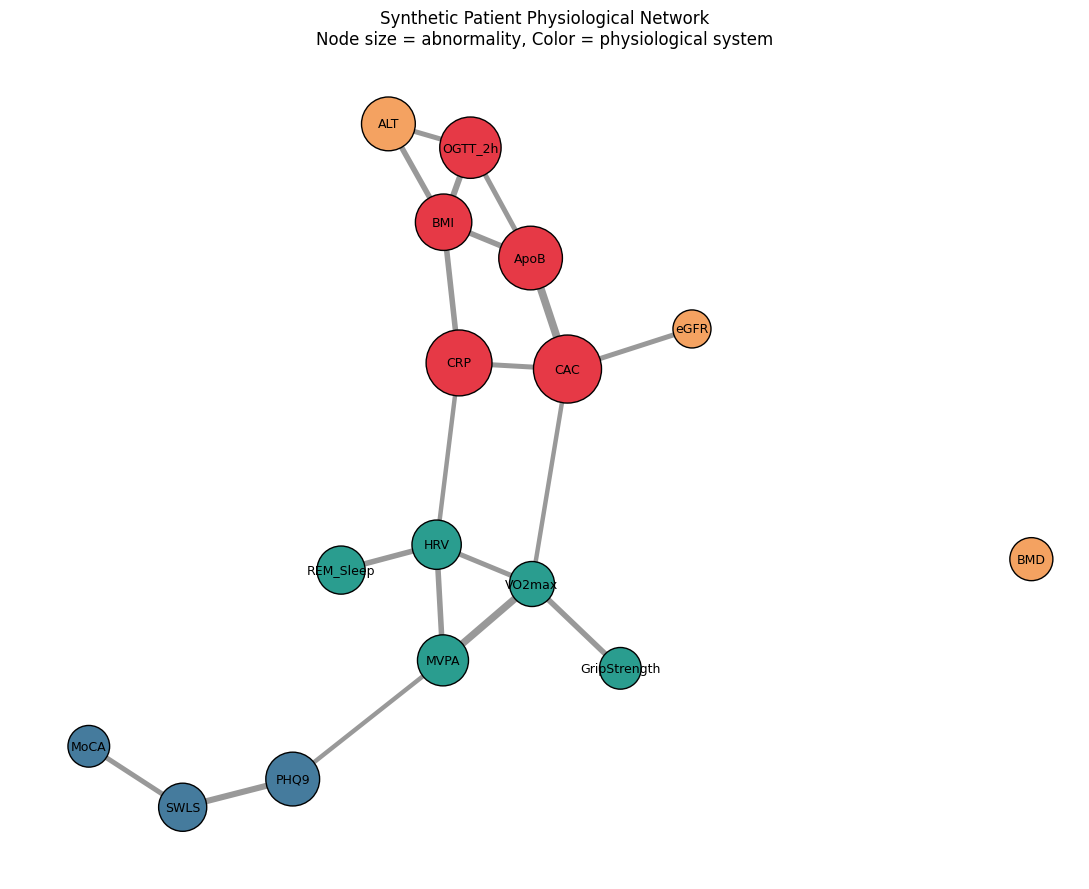

In [118]:
import networkx as nx
import matplotlib.pyplot as plt

# ============================================================
# 1. Define variables and systems (Biovista-style)
# ============================================================

variables = {
    # Cardiometabolic
    "ApoB":            {"system": "Cardiometabolic"},
    "CAC":             {"system": "Cardiometabolic"},
    "OGTT_2h":         {"system": "Cardiometabolic"},
    "BMI":             {"system": "Cardiometabolic"},
    "CRP":             {"system": "Cardiometabolic"},
    
    # Brain / Mind
    "MoCA":            {"system": "Brain/Mind"},
    "PHQ9":            {"system": "Brain/Mind"},
    "SWLS":            {"system": "Brain/Mind"},
    
    # Fitness / Sleep
    "VO2max":          {"system": "Fitness/Sleep"},
    "GripStrength":    {"system": "Fitness/Sleep"},
    "MVPA":            {"system": "Fitness/Sleep"},
    "REM_Sleep":       {"system": "Fitness/Sleep"},
    "HRV":             {"system": "Fitness/Sleep"},
    
    # Organs / Structural
    "ALT":             {"system": "Organs"},
    "eGFR":            {"system": "Organs"},
    "BMD":             {"system": "Organs"},
}

# ============================================================
# 2. Synthetic patient profile (0–100 scale)
# ============================================================

patient_scores = {
    # Cardiometabolic (not great)
    "ApoB":        40,
    "CAC":         30,
    "OGTT_2h":     45,
    "BMI":         55,
    "CRP":         35,
    
    # Brain / Mind (mixed)
    "MoCA":        80,
    "PHQ9":        60,
    "SWLS":        70,
    
    # Fitness / Sleep (pretty good)
    "VO2max":      75,
    "GripStrength":80,
    "MVPA":        65,
    "REM_Sleep":   70,
    "HRV":         68,
    
    # Organs / Structural (mild ALT bump)
    "ALT":         60,
    "eGFR":        85,
    "BMD":         78,
}

# Convert to abnormality = (100 - score)
abnormality = {k: max(0, 100 - v) for k, v in patient_scores.items()}

# ============================================================
# 3. Define physiological couplings
# ============================================================

edges = [
    # Within cardiometabolic
    ("ApoB", "CAC",        0.9),
    ("ApoB", "BMI",        0.5),
    ("ApoB", "OGTT_2h",    0.4),
    ("BMI",  "OGTT_2h",    0.6),
    ("CRP",  "CAC",        0.4),
    ("CRP",  "BMI",        0.5),
    
    # Links cardiometabolic <-> organs
    ("ALT",  "BMI",        0.5),
    ("ALT",  "OGTT_2h",    0.4),
    ("eGFR", "CAC",        0.4),
    
    # Fitness / Sleep cluster
    ("VO2max",      "MVPA",        0.8),
    ("VO2max",      "HRV",         0.4),
    ("GripStrength","VO2max",      0.5),
    ("MVPA",        "HRV",         0.5),
    ("REM_Sleep",   "HRV",         0.5),
    
    # Brain / Mind cluster
    ("MoCA",        "SWLS",        0.4),
    ("PHQ9",        "SWLS",        0.6),
    
    # Cross-system links
    ("CRP",         "HRV",         0.3),
    ("MVPA",        "PHQ9",        0.3),
    ("VO2max",      "CAC",         0.3),
]

# ============================================================
# 4. Build graph
# ============================================================

G = nx.Graph()

for var, meta in variables.items():
    G.add_node(
        var,
        system = meta["system"],
        score = patient_scores[var],
        abnormality = abnormality[var],
    )

for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# ============================================================
# 5. Define system colors
# ============================================================

system_colors = {
    "Cardiometabolic": "#e63946",  # red
    "Brain/Mind":      "#457b9d",  # blue
    "Fitness/Sleep":   "#2a9d8f",  # teal
    "Organs":          "#f4a261",  # orange
}

node_colors = [system_colors[G.nodes[n]["system"]] for n in G.nodes()]

# ============================================================
# 6. Prepare layout, sizes, widths
# ============================================================

pos = nx.spring_layout(G, weight='weight', seed=42)

node_sizes = [
    300 + 30 * G.nodes[n]["abnormality"]
    for n in G.nodes()
]

edge_widths = [
    2 + 4 * G.edges[e]["weight"]
    for e in G.edges()
]

# ============================================================
# 7. Draw the network with colors
# ============================================================

plt.figure(figsize=(11,9))

nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.4)

nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    linewidths=1,
    edgecolors="black",
)

nx.draw_networkx_labels(
    G,
    pos,
    font_size=9,
)

plt.title("Synthetic Patient Physiological Network\nNode size = abnormality, Color = physiological system")
plt.axis("off")
plt.tight_layout()
plt.show()


In [135]:
def plot_patient_network(patient_scores, title="Patient Physiological Network"):
    """
    Returns:
        fig (matplotlib.figure.Figure): figure object for saving/export.
    """

    # --------------------------
    # Create figure + axes
    # --------------------------
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Build graph
    G = nx.Graph()

    for var, meta in variables.items():
        score = patient_scores[var]
        abnormality = max(0, 100 - score)
        G.add_node(
            var,
            system=meta["system"],
            score=score,
            abnormality=abnormality,
        )

    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    # Layout
    pos = nx.spring_layout(G, weight="weight", seed=42)

    # Node sizes
    node_sizes = [
        300 + 35 * G.nodes[n]["abnormality"]
        for n in G.nodes()
    ]

    # Node colors
    node_colors = []
    for n in G.nodes():
        system = G.nodes[n]["system"]
        base = system_base_colors[system]
        abnormality = G.nodes[n]["abnormality"] / 100.0
        node_colors.append(blend_color(base, abnormality))

    # Edge widths + colors
    edge_widths = [2 + 4 * G.edges[e]["weight"] for e in G.edges()]

    edge_colors = []
    for u, v in G.edges():
        w = G.edges[(u, v)]["weight"]
        edge_color = (1 - w) * np.array([0.75, 0.75, 0.75]) + w * np.array([0, 0, 0])
        edge_colors.append(edge_color)

    # Draw edges
    nx.draw_networkx_edges(
        G,
        pos,
        width=edge_widths,
        edge_color=edge_colors,
        alpha=0.7,
        ax=ax
    )

    # Draw nodes
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=node_sizes,
        node_color=node_colors,
        edgecolors="black",
        linewidths=1.2,
        ax=ax
    )

    # Labels with outline
    label_options = {
        "font_size": 12,
        "font_color": "white",
        "font_weight": "bold",
    }

    texts = nx.draw_networkx_labels(G, pos, ax=ax, **label_options)

    for text in texts.values():
        text.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground='black'),
            path_effects.Normal()
        ])

    # Title + turn off axis
    ax.set_title(title, fontsize=16)
    ax.set_axis_off()

    # System legend
    for system, color in system_base_colors.items():
        ax.scatter([], [], c=color, label=system, s=200, edgecolors='black')

    ax.legend(
        title="Physiological System",
        scatterpoints=1,
        frameon=True,
        fontsize=10,
        loc="lower left"
    )

    fig.tight_layout()

    # --------------------------
    # Return figure (no auto-render)
    # --------------------------
    plt.close(fig)
    return fig


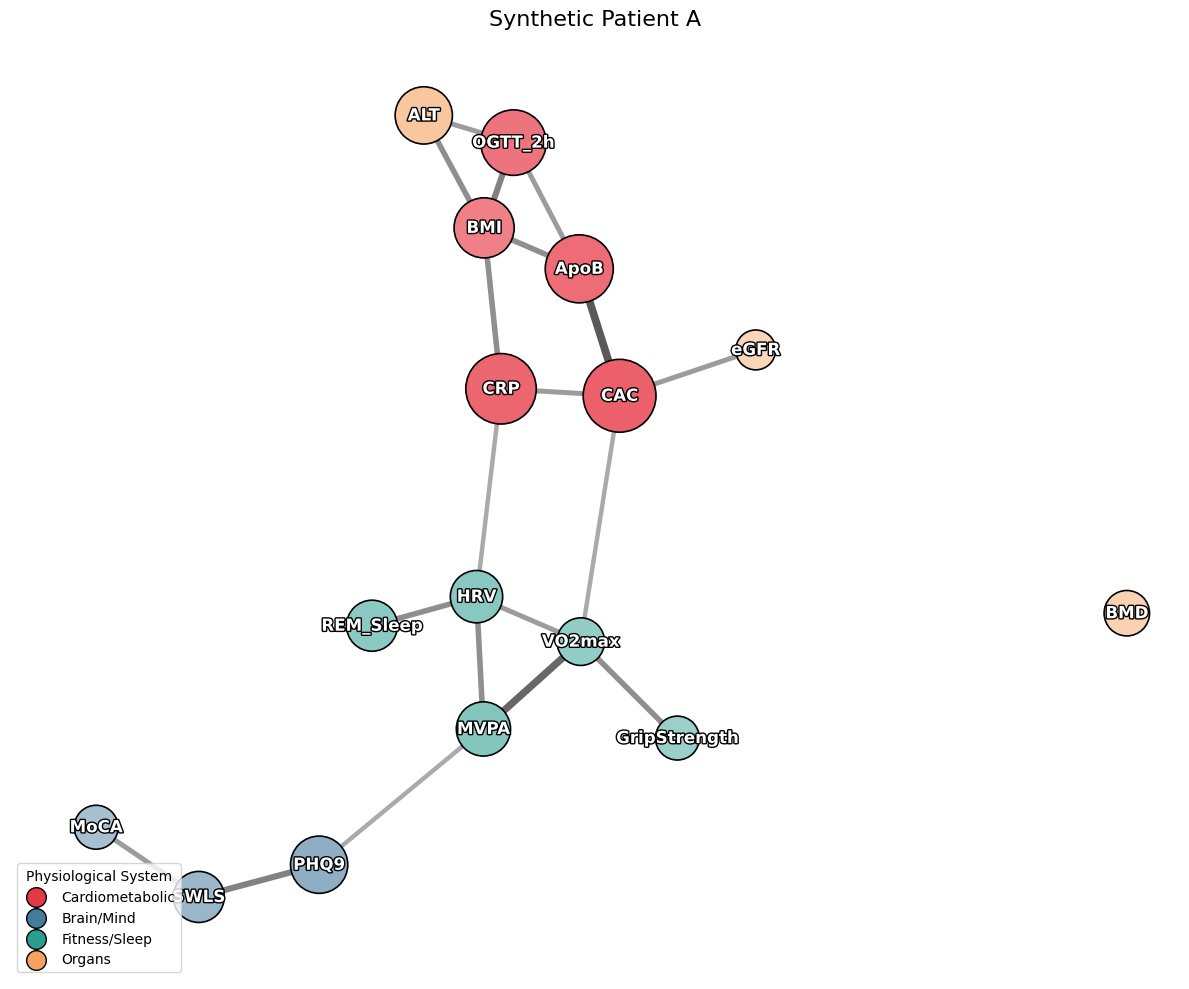

In [125]:
plot_patient_network(patient_scores, title="Synthetic Patient A")


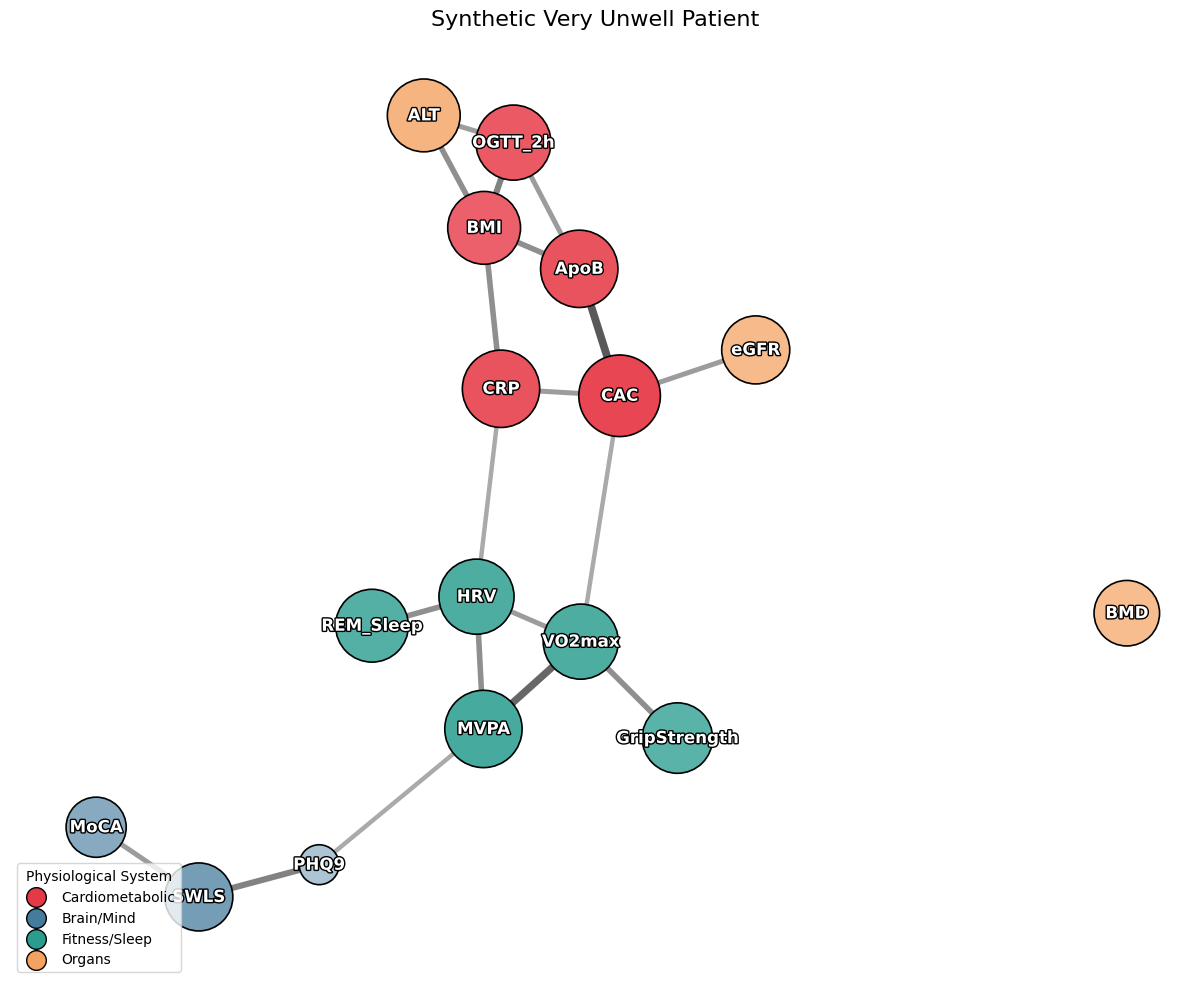

In [126]:
very_unwell_patient = {
    # Cardiometabolic (severe disease)
    "ApoB": 20,
    "CAC": 10,
    "OGTT_2h": 25,
    "BMI": 30,
    "CRP": 20,
    
    # Brain / Mind (poor cognitive-affective function)
    "MoCA": 55,
    "PHQ9": 85,    # Higher PHQ-9 = more abnormal
    "SWLS": 40,
    
    # Fitness / Sleep (severely deconditioned)
    "VO2max": 25,
    "GripStrength": 35,
    "MVPA": 20,
    "REM_Sleep": 30,
    "HRV": 25,
    
    # Organs / Structural (organ dysfunction)
    "ALT": 30,
    "eGFR": 40,
    "BMD": 45,
}

plot_patient_network(very_unwell_patient, title="Synthetic Very Unwell Patient")


In [136]:
extremely_healthy_patient = {
    # Cardiometabolic (excellent)
    "ApoB": 95,
    "CAC": 100,       # CAC=0 interpreted as “100” for the visualization
    "OGTT_2h": 95,
    "BMI": 90,
    "CRP": 95,
    
    # Brain / Mind (excellent cognitive + emotional health)
    "MoCA": 100,
    "PHQ9": 0,        # best possible
    "SWLS": 95,
    
    # Fitness / Sleep (elite)
    "VO2max": 95,
    "GripStrength": 95,
    "MVPA": 100,
    "REM_Sleep": 95,
    "HRV": 95,
    
    # Organ / Structural (excellent)
    "ALT": 95,
    "eGFR": 95,
    "BMD": 95,
}

In [137]:
fig = plot_patient_network(extremely_healthy_patient)
plt.show()
fig.savefig("extremely healthy.png", dpi=300, bbox_inches="tight")
plt.close(fig)   # prevents lingering figures




# make a slider

In [105]:
import numpy as np

def interpolate_patients(healthy, sick, t):
    """
    t ranges 0 → 1
    0 = fully healthy
    1 = fully sick
    """
    blended = {}
    for key in healthy.keys():
        blended[key] = (1 - t) * healthy[key] + t * sick[key]
    return blended


In [106]:
import plotly.graph_objects as go

def rgb_to_rgba_str(rgb, alpha=1.0):
    """Convert RGB floats (0–1) into CSS rgba() string."""
    r = int(rgb[0] * 255)
    g = int(rgb[1] * 255)
    b = int(rgb[2] * 255)
    return f"rgba({r},{g},{b},{alpha})"


def plot_patient_network_plotly(patient_scores, title="Biovista Network"):
    # Build graph
    G = nx.Graph()

    for var, meta in variables.items():
        score = patient_scores[var]
        abnormality = max(0, 100 - score)

        G.add_node(
            var,
            system=meta["system"],
            abnormality=abnormality
        )

    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    # Layout
    pos = nx.spring_layout(G, seed=42, weight="weight")

    # Node positions
    x = [pos[n][0] for n in G.nodes()]
    y = [pos[n][1] for n in G.nodes()]

    # Node sizes
    sizes = [10 + 0.4 * G.nodes[n]["abnormality"] for n in G.nodes()]

    # Node colors (converted to rgba strings)
    colors = [
        rgb_to_rgba_str(
            blend_color(
                system_base_colors[G.nodes[n]["system"]],
                G.nodes[n]["abnormality"] / 100.0
            )
        )
        for n in G.nodes()
    ]

    # Edge coordinates (corrected version!)
    edge_x = []
    edge_y = []
    for u, v in G.edges():
        edge_x += [pos[u][0], pos[v][0], None]
        edge_y += [pos[u][1], pos[v][1], None]

    # Build figure
    fig = go.Figure()

    # Edges
    fig.add_trace(go.Scatter(
        x=edge_x, y=edge_y,
        mode="lines",
        line=dict(color="rgba(0,0,0,0.25)", width=2),
        hoverinfo="none"
    ))

    # Nodes
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode="markers+text",
        text=list(G.nodes()),
        textposition="middle center",
        marker=dict(
            size=sizes,
            color=colors,
            line=dict(width=2, color="black"),
        ),
        hoverinfo="text"
    ))

    fig.update_layout(
        title=title,
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        showlegend=False,
        height=650,
        margin=dict(l=10, r=10, t=40, b=10)
    )

    return fig


In [107]:
import plotly.io as pio
pio.renderers.default = "iframe"


In [108]:
def interpolate_patients(p1, p2, t):
    """
    Linear blend between two patient dictionaries.
    t=0 -> p1 (healthy)
    t=1 -> p2 (unwell)
    """
    return {k: (1-t)*p1[k] + t*p2[k] for k in p1.keys()}


In [109]:
import numpy as np
import plotly.graph_objects as go

# Create animation frames
frames = []
T_values = np.linspace(0, 1, 20)

for i, t in enumerate(T_values):
    blended = interpolate_patients(extremely_healthy_patient, very_unwell_patient, t)
    fig_t = plot_patient_network_plotly(blended)
    frames.append(go.Frame(data=fig_t.data, name=str(i)))

# Create main figure (starting at t=0)
fig = plot_patient_network_plotly(extremely_healthy_patient, 
                                  "Biovista Physiological Network Animation")

# Add play button
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, {"frame": {"duration": 120, "redraw": True},
                                 "fromcurrent": True}]
                )
            ],
            x=1.15, y=1
        )
    ]
)

# Add slider
slider_steps = [
    dict(method="animate",
         args=[[str(i)], {"frame": {"duration": 0}, "mode": "immediate"}],
         label=f"{t:.2f}")
    for i, t in enumerate(T_values)
]

fig.update_layout(
    sliders=[dict(
        steps=slider_steps,
        active=0,
        x=0.05, y=-0.05,
        len=0.9
    )]
)

fig.update(frames=frames)

# Show animation
fig.show()


In [131]:
import os
os.listdir(os.getcwd())


['nhanes validation.pdf',
 'FPED_DR1TOT_1516_sas.exe',
 'nhanes validation.md',
 '.DS_Store',
 'nhanes_lmf_clean.csv',
 'fig_ls_fi_quartile.png',
 'validationNOV19.pdf',
 'Untitled.ipynb',
 'X_imputed.feather',
 'df_val.pkl',
 'mortality import.ipynb',
 'fig_ls_hist.png',
 'NHANES_2017_2018_MORT_2019_PUBLIC.dat',
 'nhanes validation.tex',
 'network example.ipynb',
 'nhanes_longevity_1516.csv',
 'fped_dr1tot_1516.sas7bdat',
 'nhanes_full_1516.csv',
 'NHANES 2015 initial.ipynb',
 'fig_ls_frail_groups.png',
 'iframe_figures',
 '.ipynb_checkpoints',
 'fig_fi_hist.png',
 'fig_ls_fi_scatter.png',
 '.git',
 'nhanes validation.log',
 'nhanes validation.aux',
 'NHANES import final.ipynb']